# Noise Reduction using CNN-Autoencoder

In [1]:
import numpy as np

import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load and Preprocess Data & Autoencoder

In [2]:
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

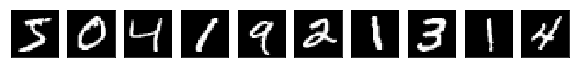

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
inputs  = Input(shape=(784,))             
enc_fc  = Dense( 32, activation='relu')   
encoded = enc_fc(inputs)
dec_fc  = Dense(784, activation='sigmoid') 
decoded = dec_fc(encoded)
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
def preprocess(x):
    x = x.astype('float32') / 255.
    return x.reshape(-1, np.prod(x.shape[1:])) 

X_train = preprocess(X_train)
X_test  = preprocess(X_test)
X_train, X_valid = train_test_split(X_train, test_size=500)


In [8]:
autoencoder.fit(X_train, X_train, epochs=42, batch_size=256, validation_data=(X_valid, X_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/42
59500/59500 [==============================] - 6s 98us/step - loss: 0.2814 - val_loss: 0.1974
Epoch 2/42
59500/59500 [==============================] - 5s 89us/step - loss: 0.1725 - val_loss: 0.1578
Epoch 3/42
59500/59500 [==============================] - 5s 89us/step - loss: 0.1457 - val_loss: 0.1383
Epoch 4/42
59500/59500 [==============================] - 6s 96us/step - loss: 0.1299 - val_loss: 0.1250
Epoch 5/42
59500/59500 [==============================] - 5s 92us/step - loss: 0.1188 - val_loss: 0.1156
Epoch 6/42
59500/59500 [==============================] - 5s 92us/step - loss: 0.1111 - val_loss: 0.1091
Epoch 7/42
59500/59500 [==============================] - 7s 116us/step - loss: 0.1059 - val_loss: 0.1048
Epoch 8/42
59500/59500 [==============================] - 6s 102us/step - loss: 0.1021 - val_loss: 0.1013
Epoch 9/42
59500/59500 [==============================] - 6s 95us/step - loss: 0.0995 - val_loss: 0.0992
Epoch

In [9]:
encoder = Model(inputs, encoded)
X_test_encoded = encoder.predict(X_test)
decoder_inputs = Input(shape=(32,))
decoder = Model(decoder_inputs, dec_fc(decoder_inputs))
X_test_decoded = decoder.predict(X_test_encoded)

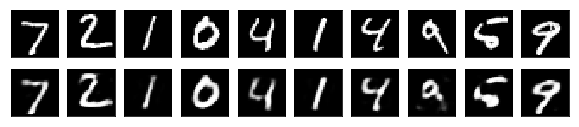

In [10]:
def show_images(before_images, after_images):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        # before
        plt.subplot(2, 10, i+1)
        plt.imshow(before_images[i].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        # after
        plt.subplot(2, 10, 10+i+1)
        plt.imshow(after_images[i].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
show_images(X_test, X_test_decoded)

### CNN Autoencoder

In [11]:
def make_convolutional_autoencoder():
    # encoding
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    encoded = MaxPooling2D(padding='same')(x)    
    
    # decoding
    x = Conv2D( 8, 3, activation='relu', padding='same')(encoded)
    x = UpSampling2D()(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    x = Conv2D(16, 3, activation='relu')(x) 
    x = UpSampling2D()(x)
    decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)    
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder


autoencoder = make_convolutional_autoencoder()

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

Train on 59500 samples, validate on 500 samples
Epoch 1/42
59500/59500 [==============================] - 68s 1ms/step - loss: 0.2998 - val_loss: 0.1751
Epoch 2/42
59500/59500 [==============================] - 61s 1ms/step - loss: 0.1536 - val_loss: 0.1410
Epoch 3/42
59500/59500 [==============================] - 61s 1ms/step - loss: 0.1331 - val_loss: 0.1297
Epoch 4/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1251 - val_loss: 0.1236
Epoch 5/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1205 - val_loss: 0.1205
Epoch 6/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1173 - val_loss: 0.1174
Epoch 7/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1147 - val_loss: 0.1148
Epoch 8/42
59500/59500 [==============================] - 63s 1ms/step - loss: 0.1125 - val_loss: 0.1127
Epoch 9/42
59500/59500 [==============================] - 63s 1ms/step - loss: 0.1107 - val_loss: 0.1109
Epoch 1

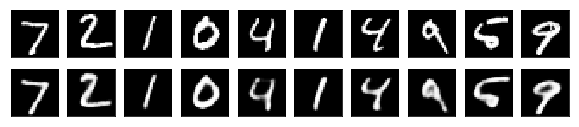

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

autoencoder.fit(X_train, X_train, epochs=42, batch_size=256, validation_data=(X_valid, X_valid))
X_test_decoded = autoencoder.predict(X_test)

show_images(X_test, X_test_decoded)

### Autoencoder with Noise

In [13]:
def add_noise(x, noise_factor=0.2):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x
    
X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy  = add_noise(X_test)

autoencoder = make_convolutional_autoencoder()
autoencoder.fit(X_train_noisy, X_train, epochs=42, batch_size=256, validation_data=(X_valid_noisy, X_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/42
59500/59500 [==============================] - 63s 1ms/step - loss: 0.3091 - val_loss: 0.1963
Epoch 2/42
59500/59500 [==============================] - 66s 1ms/step - loss: 0.1752 - val_loss: 0.1614
Epoch 3/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1531 - val_loss: 0.1473
Epoch 4/42
59500/59500 [==============================] - 61s 1ms/step - loss: 0.1423 - val_loss: 0.1390
Epoch 5/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1342 - val_loss: 0.1317
Epoch 6/42
59500/59500 [==============================] - 61s 1ms/step - loss: 0.1281 - val_loss: 0.1265
Epoch 7/42
59500/59500 [==============================] - 62s 1ms/step - loss: 0.1238 - val_loss: 0.1228
Epoch 8/42
59500/59500 [==============================] - 61s 1ms/step - loss: 0.1208 - val_loss: 0.1205
Epoch 9/42
59500/59500 [==============================] - 61s 1ms/step - loss: 0.1187 - val_loss: 0.1184
Epoch 1

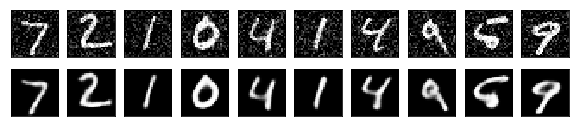

In [14]:
X_test_decoded = autoencoder.predict(X_test_noisy)

show_images(X_test_noisy, X_test_decoded)